In [52]:
import pandas as pd 
import numpy as np 

In [53]:
dataset = pd.read_csv("apple_5yr_one.csv")

In [54]:
dataset.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400


In [55]:
dataset = dataset.drop(0)

In [56]:
dataset.dtypes

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [57]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    if col in dataset.columns:
        dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in dataset.")

In [58]:
dataset['High_Low'] = dataset['High'] - dataset['Low']
dataset['Open_Close'] = dataset['Open'] - dataset['Close']
dataset['Daily_Return'] = dataset['Close'].pct_change()
dataset['Target'] = (dataset['Close'].shift(-1) > dataset['Close']).astype(int)  # 1 if price goes up next day

dataset = dataset.dropna()

In [59]:
#dataset.set_index("Date", inplace=True)

In [60]:
dataset.head()

,Date,Close,High,Low,Open,Volume,High_Low,Open_Close,Daily_Return,Target
2,2020-06-05,80.560219,80.620973,78.550469,78.579630,137250400,2.070504,-1.980589,0.028481,1
3,2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400,1.526148,-0.780083,0.005913,1
4,2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400,3.305029,-2.879749,0.031578,1
5,2020-06-10,85.746208,86.215230,84.105842,84.545702,166651600,2.109388,-1.200506,0.025728,0
6,2020-06-11,81.629494,85.313636,81.527431,84.888356,201662400,3.786206,3.258862,-0.048010,1


In [61]:
dataest = dataset.dropna()

In [62]:
import matplotlib.pyplot as plt 

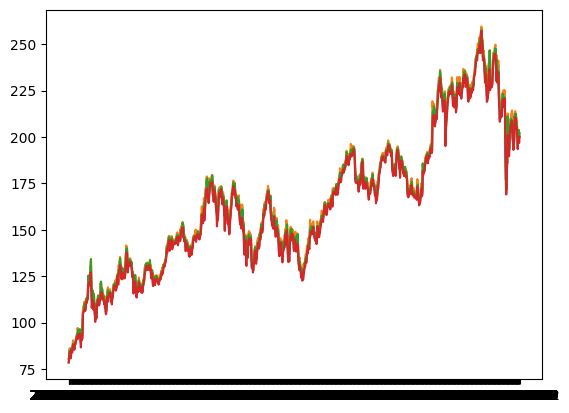

In [70]:
plt.plot(dataset["Date"], dataset["Close"])
plt.plot(dataset["Date"], dataset["High"])
plt.plot(dataset["Date"], dataset["Open"])
plt.plot(dataset["Date"], dataset["Low"])